In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [33]:
import numpy as np
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt

In [4]:
url = "https://www.ndbc.noaa.gov/data/realtime2/46025.data_spec"

In [5]:
response = requests.get(url)
data = response.text

In [6]:
data

'#YY  MM DD hh mm Sep_Freq  < spec_1 (freq_1) spec_2 (freq_2) spec_3 (freq_3) ... >\n2019 07 14 00 00 0.250 0.000 (0.033) 0.000 (0.038) 0.000 (0.043) 0.159 (0.048) 0.245 (0.053) 0.126 (0.058) 0.113 (0.063) 0.126 (0.068) 0.272 (0.073) 0.305 (0.078) 0.186 (0.083) 0.179 (0.088) 0.159 (0.093) 0.212 (0.100) 0.550 (0.110) 0.663 (0.120) 0.259 (0.130) 0.272 (0.140) 0.265 (0.150) 0.298 (0.160) 0.225 (0.170) 0.239 (0.180) 0.232 (0.190) 0.252 (0.200) 0.133 (0.210) 0.126 (0.220) 0.166 (0.230) 0.119 (0.240) 0.046 (0.250) 0.040 (0.260) 0.046 (0.270) 0.027 (0.280) 0.040 (0.290) 0.020 (0.300) 0.033 (0.310) 0.013 (0.320) 0.013 (0.330) 0.013 (0.340) 0.013 (0.350) 0.013 (0.365) 0.013 (0.385) 0.007 (0.405) 0.000 (0.425) 0.000 (0.445) 0.000 (0.465) 0.000 (0.485) \n2019 07 13 23 00 0.250 0.000 (0.033) 0.000 (0.038) 0.065 (0.043) 0.176 (0.048) 0.189 (0.053) 0.254 (0.058) 0.215 (0.063) 0.078 (0.068) 0.170 (0.073) 0.209 (0.078) 0.124 (0.083) 0.091 (0.088) 0.137 (0.093) 0.339 (0.100) 0.359 (0.110) 0.652 (0.120)

In [10]:
for line in data.splitlines():
    print(line)

#YY  MM DD hh mm Sep_Freq  < spec_1 (freq_1) spec_2 (freq_2) spec_3 (freq_3) ... >
2019 07 14 00 00 0.250 0.000 (0.033) 0.000 (0.038) 0.000 (0.043) 0.159 (0.048) 0.245 (0.053) 0.126 (0.058) 0.113 (0.063) 0.126 (0.068) 0.272 (0.073) 0.305 (0.078) 0.186 (0.083) 0.179 (0.088) 0.159 (0.093) 0.212 (0.100) 0.550 (0.110) 0.663 (0.120) 0.259 (0.130) 0.272 (0.140) 0.265 (0.150) 0.298 (0.160) 0.225 (0.170) 0.239 (0.180) 0.232 (0.190) 0.252 (0.200) 0.133 (0.210) 0.126 (0.220) 0.166 (0.230) 0.119 (0.240) 0.046 (0.250) 0.040 (0.260) 0.046 (0.270) 0.027 (0.280) 0.040 (0.290) 0.020 (0.300) 0.033 (0.310) 0.013 (0.320) 0.013 (0.330) 0.013 (0.340) 0.013 (0.350) 0.013 (0.365) 0.013 (0.385) 0.007 (0.405) 0.000 (0.425) 0.000 (0.445) 0.000 (0.465) 0.000 (0.485) 
2019 07 13 23 00 0.250 0.000 (0.033) 0.000 (0.038) 0.065 (0.043) 0.176 (0.048) 0.189 (0.053) 0.254 (0.058) 0.215 (0.063) 0.078 (0.068) 0.170 (0.073) 0.209 (0.078) 0.124 (0.083) 0.091 (0.088) 0.137 (0.093) 0.339 (0.100) 0.359 (0.110) 0.652 (0.120) 0.

In [27]:
from app.models import Buoy, RawSpectralWaveData

In [29]:
from app import app, db

In [30]:
station_id = "46025"
buoy = db.session.query(Buoy).filter(Buoy.station_id == station_id).first();
buoy

46025 - Santa Monica Basin - 33NM WSW of Santa Monica, CA

In [26]:
import datetime

for line in data.splitlines()[1:]:
    
    columns = line.split()
    
    #print(line)
    #print("break")
    #print(columns)
    #print("break")
    sep_freq = columns[5]
    
    ts = datetime.datetime(int(columns[0]), int(columns[1]), int(columns[2]), int(columns[3]), int(columns[4]), tzinfo=datetime.timezone.utc)
    
    x, y = [], []
    
    count = 0
    for val in columns[6:]:
        
        if (count % 2 == 0):
            #print("x")
            #print(val)
            x.append(float(val))
        else:
            #print("y")
            val = val.replace('(', '')
            val = val.replace(')', '')
            #print(val)
            y.append(float(val))
        
        count += 1
    
    #print(x)
    #print(y)
    
        

/Users/yipstar/anaconda/envs/cv-nd/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


[        inf         inf         inf 32.25806452  3.98406375  0.69979006
  0.63694268  1.87265918  3.3557047   3.74531835  3.03030303  4.90196078
 10.63829787 10.63829787  7.09219858  4.54545455  3.74531835  3.98406375
  7.09219858  5.78034682 10.63829787 12.65822785  7.09219858 10.63829787
 12.65822785 21.27659574 12.65822785 12.65822785 21.27659574 21.27659574
 21.27659574 62.5        32.25806452 62.5        62.5        62.5
         inf 62.5        62.5        62.5                inf         inf
         inf         inf         inf         inf]


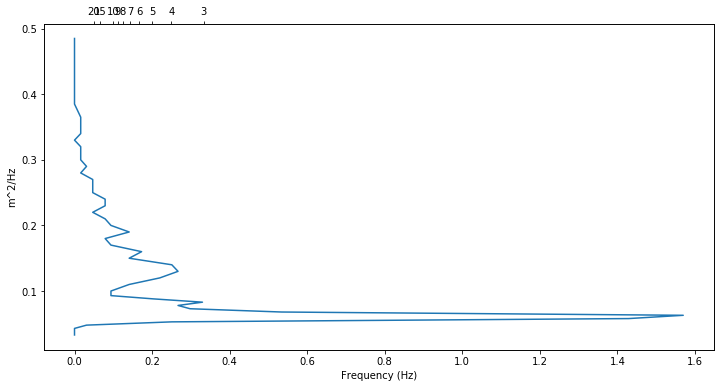

In [34]:
def tick_function(x):
    return 1.0/np.array(x)

ticks = tick_function(x)
print(ticks)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(x, y)
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("m^2/Hz")

#new_tick_locations = np.array([.2, .5, .9])
#new_tick_locations = [20,15,10,9,8,7,6,5,4,3]
new_tick_locations = [.05, .0666, .1, .111, .125, .1428, .1666, .2, .25, .333]
new_tick_labels = [20,15,10,9,8,7,6,5,4,3]

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
#ax2.set_xticks(new_tick_locations)
#ax2.set_xticklabels(tick_function(new_tick_locations))
#ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xticklabels(new_tick_labels)
#ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")
plt.show()

In [35]:
from app.importer import *

### import_raw_spectral_wave_data()